___
# Simulations for local ancestry PRS
___

In [1]:
import pandas as pd
import seaborn as sns
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools

In [2]:
m = 1000
h2 = 0.67
path_tree = "/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/trees/tree_sub_CEU_1.95e5.hdf"
path_tree = "/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/trees/tree_YRI_5e4_CEU_2e5_chr22.hdf5"

In [ ]:
def load_data(sim,m,h2):
    sim_dict = {}
    
    prs_anc = pd.read_csv("../results/sim{}/admix_afr_amer_m_{}_h2_{}_r2_0.2_p_0.01.prop.anc.PRS".format(sim,m,h2),sep="\t",index_col=0)
    total_anc = pd.read_csv("../results/sim{}/admix_afr_amer.prop.anc".format(sim),sep="\t",index_col=0)
    sim_dict["PRS_ANC"] = prs_anc
    sim_dict["TOTAL_ANC"] = total_anc
    
    sum_stats = pd.read_csv("../results/sim{}/emp_prs/comm_maf_0.01_sum_stats_m_{}_h2_{}.txt".format(sim,m,h2),index_col=0,sep="\t")
    emp_prs = h5py.File("../results/sim{}/emp_prs/emp_prs_m_{}_h2_{}_ld_CEU_GWAS_r2_0.2_p0.01.hdf5".format(sim,m,h2),"r")
    prs_vars = np.loadtxt("../results/sim{}/emp_prs/clumped_prs_vars_m_{}_h2_{}_ld_CEU_GWAS_r2_0.2_p0.01.txt".format(sim,m,h2))
    sim_dict["SS"] = sum_stats
    sim_dict["EMP_PRS"] = emp_prs
    sim_dict["PRS_VARS"] = prs_vars
    
    true_prs = h5py.File("../results/sim{}/true_prs/prs_m_{}_h2_{}.hdf5".format(sim,m,h2),"r")
    labels = h5py.File("../results/sim{}/true_prs/train_test_m_{}_h2_{}.hdf5".format(sim,m,h2),"r")
    sim_dict["TRUE_PRS"] = true_prs
    sim_dict["LABELS"] = labels
    
    return sim_dict

# Plot Correlation

### OVERALL ANCESTRY

In [2]:
sns.set_context("paper")
sns.set(style = 'whitegrid', font_scale = 2)

In [3]:
full_df_prs = pd.DataFrame(columns = ["m","h2","pval","r2","train_corr","test_EUR_corr","test_ADMIX_corr",
                                 "ADMIX_low_eur_corr","ADMIX_mid_eur_corr","ADMIX_high_eur_corr"])
for f in glob.glob("../results/summary/corrs/*/summary*PRS.txt"):
    df = pd.read_csv(f,sep="\t",index_col=0)
    df.index = [f.split("_")[-1].split(".")[0]]
    df.loc[:,"m"] = int(f.split("_")[6])
    df.loc[:,"h2"] = float(f.split("_")[8])
    df.loc[:,"pval"] = float(f.split("_")[12])
    df.loc[:,"r2"] = float(f.split("_")[10])
    full_df_prs = full_df_prs.append(df,ignore_index=False,sort=True)

In [4]:
my_rgbs = np.array(["#103c42","#02576c","#05a19c","#ffe837"])

In [5]:
def plot_correlation(data,axis,palette,title=""):
#     g = sns.boxplot(data = data,palette=palette,ax = axis)
    g = sns.violinplot(data = data,palette=palette,ax = axis,cut=0)
    g.set_xticklabels("")
    axis.set_title(title)
    return 

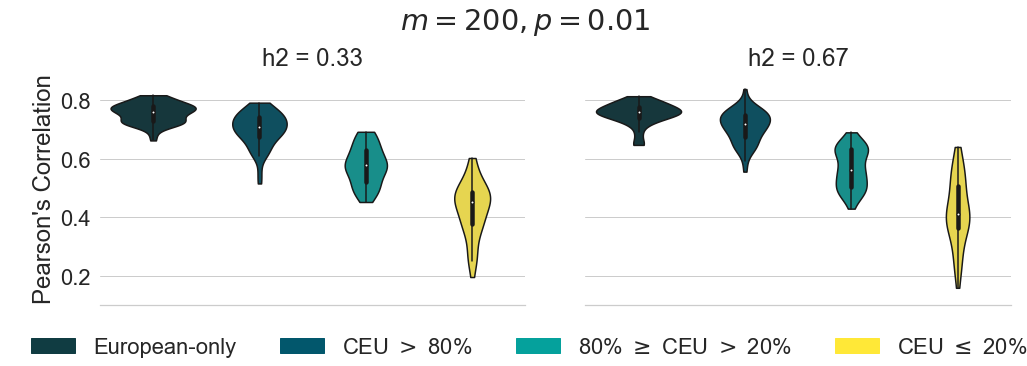

In [6]:
fig,ax = plt.subplots(1,2,figsize=(15,5),sharey = True)

cols = ["test_EUR_corr","ADMIX_high_eur_corr","ADMIX_mid_eur_corr","ADMIX_low_eur_corr"]
plot_correlation(full_df_prs.loc[(full_df_prs["m"]==200)&(full_df_prs["h2"]==0.33)&(full_df_prs["pval"]==0.01)
                                 ,cols] ,ax[0],my_rgbs,title="h2 = 0.33")
plot_correlation(full_df_prs.loc[(full_df_prs["m"]==200)&(full_df_prs["h2"]==0.67)&(full_df_prs["pval"]==0.01)
                                 ,cols],ax[1],my_rgbs,title="h2 = 0.67")

plt.ylim(0.1,0.9)
ax[0].set_ylabel("Pearson's Correlation")

legend_dict = dict(zip(["European-only","CEU $>$ 80%","80% $\geq$ CEU $>$ 20%", "CEU $\leq$ 20%"],my_rgbs))
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

fig.legend(handles=patchList,bbox_to_anchor=(0.49,-0.03),loc=8,ncol=4,fancybox=False,frameon=False)

sns.despine(left=True)
fig.suptitle("$m = 200, p = 0.01$")
fig.tight_layout(pad=2)
plt.savefig("/Users/taylorcavazos/Desktop/varying_h2.pdf",astype="pdf",bbox_inches="tight")
# plt.savefig("/Users/taylorcavazos/Documents/Posters/ASHG2019/result1.pdf",astype="pdf",
#            bbox_inches="tight")
plt.show()

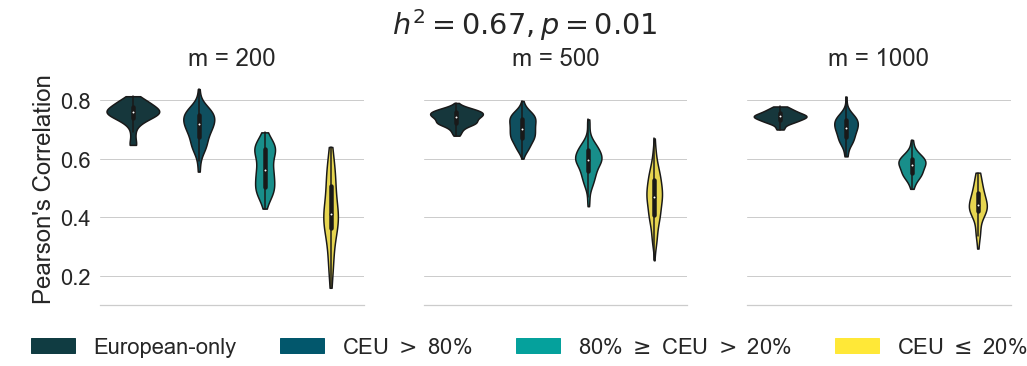

In [7]:
fig,ax = plt.subplots(1,3,figsize=(15,5),sharey = True)

cols = ["test_EUR_corr","ADMIX_high_eur_corr","ADMIX_mid_eur_corr","ADMIX_low_eur_corr"]
plot_correlation(full_df_prs.loc[(full_df_prs["m"]==200)&(full_df_prs["h2"]==0.67)&(full_df_prs["pval"]==0.01)
                                 ,cols] ,ax[0],my_rgbs,title="m = 200")
plot_correlation(full_df_prs.loc[(full_df_prs["m"]==500)&(full_df_prs["h2"]==0.67)&(full_df_prs["pval"]==0.01)
                                 ,cols],ax[1],my_rgbs,title="m = 500")
plot_correlation(full_df_prs.loc[(full_df_prs["m"]==1000)&(full_df_prs["h2"]==0.67)&(full_df_prs["pval"]==0.01)
                                 ,cols],ax[2],my_rgbs,title="m = 1000")

plt.ylim(0.1,0.9)
ax[0].set_ylabel("Pearson's Correlation")

legend_dict = dict(zip(["European-only","CEU $>$ 80%","80% $\geq$ CEU $>$ 20%", "CEU $\leq$ 20%"],my_rgbs))
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

fig.legend(handles=patchList,bbox_to_anchor=(0.49,-0.03),loc=8,ncol=4,fancybox=False,frameon=False)

sns.despine(left=True)
fig.suptitle("$h^2 = 0.67, p = 0.01$")
fig.tight_layout(pad=2)
plt.savefig("/Users/taylorcavazos/Desktop/varying_m.pdf",astype="pdf",bbox_inches="tight")
# plt.savefig("/Users/taylorcavazos/Documents/Posters/ASHG2019/result1.pdf",astype="pdf",
#            bbox_inches="tight")
plt.show()

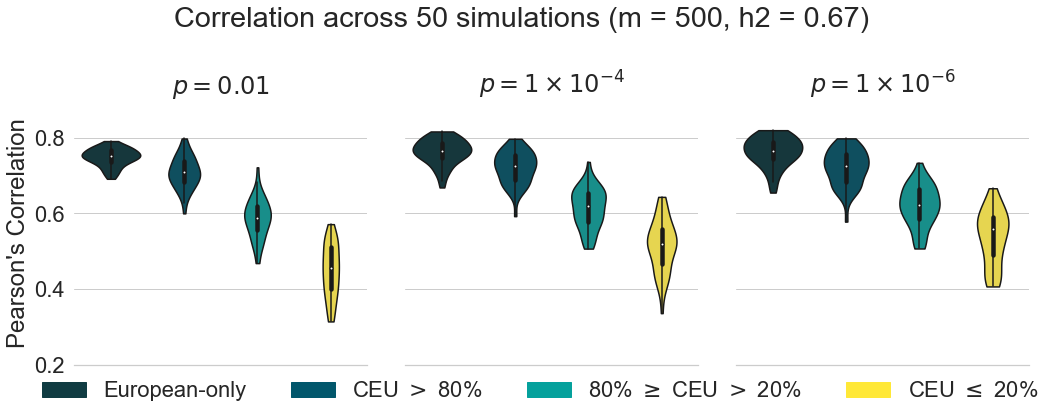

In [8]:
fig,ax = plt.subplots(1,3,figsize=(15,5),sharey = True)

cols = ["test_EUR_corr","ADMIX_high_eur_corr","ADMIX_mid_eur_corr","ADMIX_low_eur_corr"]
plot_correlation(full_df_prs.loc[(full_df_prs["m"]==500)&(full_df_prs["h2"]==0.67)&(full_df_prs["pval"]==0.01) \
                                 &(full_df_prs["r2"]==0.2),cols],
                 ax[0],my_rgbs,title=r"$p = 0.01$")

plot_correlation(full_df_prs.loc[(full_df_prs["m"]==500)&(full_df_prs["h2"]==0.67)&(full_df_prs["pval"]==1e-4) \
                                 &(full_df_prs["r2"]==0.2),cols],
                 ax[1],my_rgbs,title = r"$p = 1 \times 10^{-4}$")

plot_correlation(full_df_prs.loc[(full_df_prs["m"]==500)&(full_df_prs["h2"]==0.67)&(full_df_prs["pval"]==1e-6) \
                                 &(full_df_prs["r2"]==0.2),cols],
                 ax[2],my_rgbs, title = r"$p = 1 \times 10^{-6}$")

plt.ylim(0.2,0.9)
ax[0].set_ylabel("Pearson's Correlation")

legend_dict = dict(zip(["European-only","CEU $>$ 80%","80% $\geq$ CEU $>$ 20%", "CEU $\leq$ 20%"],my_rgbs))
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

fig.legend(handles=patchList,bbox_to_anchor=(0.5,-0.03),loc=8,ncol=4,fancybox=False,frameon=False)

sns.despine(left=True)

fig.suptitle("Correlation across 50 simulations (m = 500, h2 = 0.67)",y=1.1)
fig.tight_layout()

# plt.savefig("/Users/taylorcavazos/Documents/Posters/ASHG2019/result1.pdf",astype="pdf",
#            bbox_inches="tight")
plt.show()

In [9]:
p = [0.01,1e-4,1e-6]
r2 = [0.01,0.05,0.2]

In [10]:
pairs = list(itertools.product(p,r2))

In [11]:
cols = ["test_EUR_corr","ADMIX_high_eur_corr","ADMIX_mid_eur_corr","ADMIX_low_eur_corr"]
sub_df = full_df_prs.loc[(full_df_prs["m"]==500)&(full_df_prs["h2"]==0.67),:]

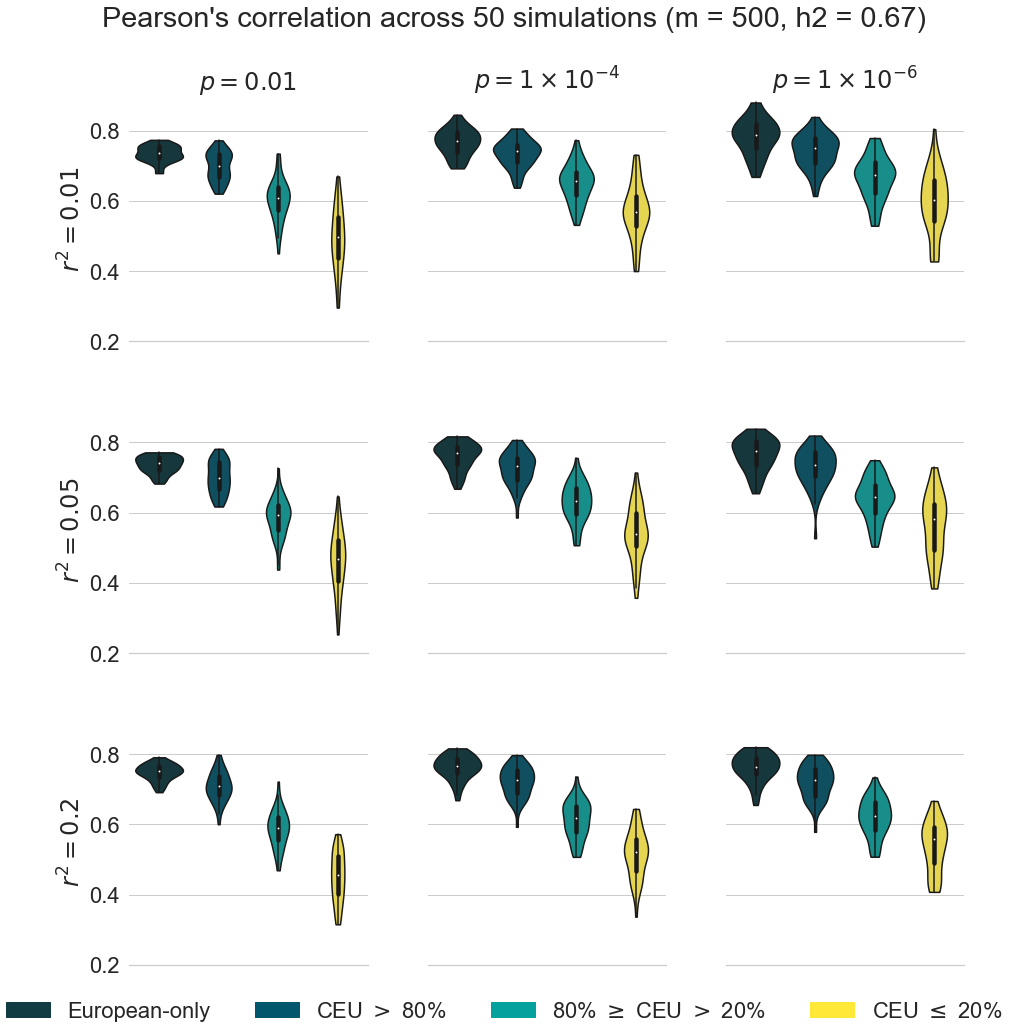

In [12]:
fig,ax = plt.subplots(3,3,figsize=(14,14),sharey = True, sharex = True)

for num, axes in enumerate(ax.T.ravel()):
    plot_correlation(sub_df.loc[(sub_df["pval"]==pairs[num][0])&(sub_df["r2"]==pairs[num][1]),cols],
                    axes,my_rgbs)


    
ax[0,0].set_title(r"$p = 0.01$")
ax[0,1].set_title(r"$p = 1 \times 10^{-4}$")
ax[0,2].set_title(r"$p = 1 \times 10^{-6}$")
ax[0,0].set_ylabel(r"$r^2 = 0.01$")
ax[1,0].set_ylabel(r"$r^2 = 0.05$")
ax[2,0].set_ylabel(r"$r^2 = 0.2$")

plt.ylim(0.2,0.9)
# ax.set_ylabel("Pearson's Correlation")


legend_dict = dict(zip(["European-only","CEU $>$ 80%","80% $\geq$ CEU $>$ 20%", "CEU $\leq$ 20%"],my_rgbs))
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

fig.legend(handles=patchList,bbox_to_anchor=(0.5,-0.01),loc=8,ncol=4,fancybox=False,frameon=False)

sns.despine(left=True)

fig.suptitle("Pearson's correlation across 50 simulations (m = 500, h2 = 0.67)",y=1.01)
fig.tight_layout(pad=2)

# plt.savefig("/Users/taylorcavazos/Documents/Posters/ASHG2019/result1.pdf",astype="pdf",
#            bbox_inches="tight")
plt.show()

In [39]:
from scipy import stats

In [48]:
stats.ttest_ind(test["ADMIX_mid_eur_corr"],test["ADMIX_low_eur_corr"])

Ttest_indResult(statistic=4.426530613858244, pvalue=2.488722219673547e-05)

In [40]:
test = sub_df.loc[(sub_df["pval"]==1e-6)&(sub_df["r2"]==0.01)]

In [41]:
test

,ADMIX_high_eur_corr,ADMIX_low_eur_corr,ADMIX_mid_eur_corr,h2,m,pval,r2,test_ADMIX_corr,test_EUR_corr,train_corr
5,0.667386,0.574410,0.593069,0.67,500,0.000001,0.01,0.571750,0.749124,0.828958
41,0.682568,0.570022,0.623989,0.67,500,0.000001,0.01,0.644030,0.687017,0.779455
23,0.727103,0.634587,0.683548,0.67,500,0.000001,0.01,0.656893,0.779709,0.841213
33,0.708512,0.674869,0.693366,0.67,500,0.000001,0.01,0.675136,0.773394,0.848581
15,0.758138,0.665803,0.713320,0.67,500,0.000001,0.01,0.707441,0.789821,0.862395
48,0.791117,0.690637,0.760471,0.67,500,0.000001,0.01,0.739091,0.810680,0.882961
14,0.647293,0.530348,0.562820,0.67,500,0.000001,0.01,0.555730,0.668194,0.779456
49,0.768907,0.581474,0.685736,0.67,500,0.000001,0.01,0.673588,0.785954,0.870108
4,0.644020,0.590805,0.615827,0.67,500,0.000001,0.01,0.593530,0.731261,0.823439
50,0.784427,0.737288,0.753682,0.67,500,0.000001,0.01,0.770056,0.804919,0.870268


# Plot maf bins

In [19]:
all_df = pd.DataFrame(columns=["Sim","Pop","G1","G2","G3","G4","G5","G6"])
for file in glob.glob("../results/summary/maf_sims/causal_maf*"):
    df = pd.read_csv(file,sep="\t")
    all_df = all_df.append(df,ignore_index=True)

In [20]:
all_df.loc[(all_df["Sim"]==1) | (all_df["Sim"]==15) | (all_df["Sim"]==29),:]

,Sim,Pop,G1,G2,G3,G4,G5,G6
0,1,Admixed,0.840000,0.095000,0.020000,0.020000,0.010000,0.015000
1,1,European,0.900000,0.045000,0.020000,0.005000,0.015000,0.015000
2,1,All_SNPs,0.917104,0.038151,0.013599,0.010324,0.011428,0.009393
27,29,Admixed,0.840000,0.090000,0.025000,0.025000,0.015000,0.005000
28,29,European,0.890000,0.050000,0.030000,0.020000,0.010000,0.000000
29,29,All_SNPs,0.916338,0.040334,0.015516,0.010587,0.009119,0.008106
30,15,Admixed,0.850000,0.100000,0.020000,0.005000,0.005000,0.020000
31,15,European,0.915000,0.045000,0.010000,0.015000,0.005000,0.010000
32,15,All_SNPs,0.913827,0.040763,0.016380,0.011233,0.009196,0.008601


In [21]:
df_long = pd.melt(all_df.iloc[:,1:],"Pop",var_name="G")

In [22]:
list(ax.get_yticklabels())

[Text(0, 0.0, '0.0'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.4, '0.4'),
 Text(0, 0.6000000000000001, '0.6'),
 Text(0, 0.8, '0.8'),
 Text(0, 1.0, '1.0')]

In [23]:
# extra color to add "#052049"

In [24]:
file

'../results/summary/maf_sims/causal_maf_bins_m_200_h2_0.33_47.txt'

In [25]:
df_long

,Pop,G,value
0,Admixed,G1,0.840000
1,European,G1,0.900000
2,All_SNPs,G1,0.917104
3,Admixed,G1,0.875000
4,European,G1,0.915000
5,All_SNPs,G1,0.914803
6,Admixed,G1,0.890000
7,European,G1,0.935000
8,All_SNPs,G1,0.917301
9,Admixed,G1,0.870000


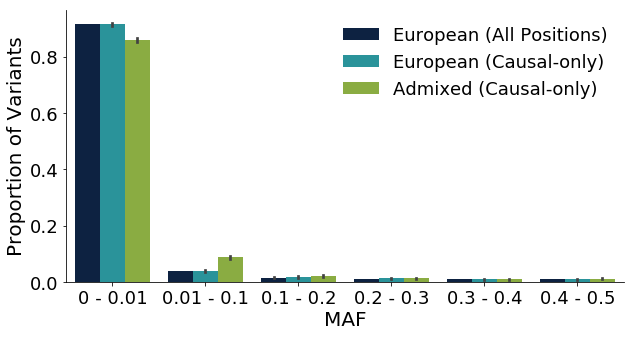

In [33]:
plt.figure(figsize=(10,5))
plt.rc('ytick',labelsize=18)
ax = sns.barplot(x="G",hue="Pop",y="value",data=df_long,palette=["#052049","#18A3AC","#90BD31"],hue_order=["All_SNPs","European","Admixed"])

plt.xlabel("MAF",fontsize=20)
plt.ylabel("Proportion of Variants",fontsize=20)

ax.set_xticklabels(labels=["0 - 0.01","0.01 - 0.1","0.1 - 0.2","0.2 - 0.3","0.3 - 0.4","0.4 - 0.5"],fontsize=18)

sns.despine()
h, l = ax.get_legend_handles_labels()
plt.legend(h,["European (All Positions)", "European (Causal-only)", "Admixed (Causal-only)"],frameon=False,fontsize=18)
# plt.savefig("/Users/taylorcavazos/Desktop/maf_bars.pdf",type="pdf",
#            bbox_inches="tight")
plt.show()

In [ ]:
all_df

In [ ]:
np.mean(data2["ADMIX_low_eur_corr"])

In [ ]:
np.mean(data1["ADMIX_low_eur_corr"])

In [ ]:
# data2 = full_df.loc[:,["test_EUR_corr","ADMIX_high_eur_corr","ADMIX_mid_eur_corr","ADMIX_low_eur_corr"]]
ax = sns.violinplot(data = data1,palette=my_rgbs)
#ax = sns.boxplot(data = data,palette=my_rgbs)
#ax = sns.stripplot(data=data2,jitter=True,palette=my_rgbs,size=6)

ax.set_xticklabels(["European-only","CEU >= 80%","80% > CEU > 20%", "CEU <= 20%"],
                   rotation=45)
ax.set_yticks(np.arange(0,1.2,0.2))
plt.ylabel("Pearson's Correlation")
sns.despine()
plt.show()

In [ ]:
stats.ttest_ind(data1["ADMIX_high_eur_corr"], data1["ADMIX_low_eur_corr"])

In [ ]:
stats.ttest_ind(data1["ADMIX_high_eur_corr"], data1["ADMIX_mid_eur_corr"])

In [ ]:
stats.ttest_ind(data1["ADMIX_low_eur_corr"], data1["ADMIX_mid_eur_corr"])

In [ ]:
stats.ttest_ind(data1["test_EUR_corr"], data1["ADMIX_low_eur_corr"])

In [ ]:
stats.ttest_ind(data2["ADMIX_high_eur_corr"], data2["ADMIX_low_eur_corr"])

In [ ]:
stats.ttest_ind(data2["ADMIX_high_eur_corr"], data2["ADMIX_mid_eur_corr"])

In [ ]:
stats.ttest_ind(data2["ADMIX_low_eur_corr"], data2["ADMIX_mid_eur_corr"])

In [ ]:
stats.ttest_ind(data2["test_EUR_corr"], data2["ADMIX_low_eur_corr"])

### PRS-Specific Ancestry

____
# Number of Causal Inds Found

In [ ]:
num_found = np.loadtxt("../results/summary/causal_inds_identified.txt",dtype=int)

In [ ]:
int(np.average(num_found))

In [ ]:
int(np.std(num_found))

In [ ]:
(int(np.std(num_found))*2)/1000

In [ ]:
int(np.average(num_found))/1000

_ _ _
# Quick comparison emprical vs true prs

In [ ]:
import h5py, pandas as pd, numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
sim=1

In [ ]:
true_prs = h5py.File('../data/sim{}/true_prs/prs_m_1000_h2_0.67.hdf5'.format(sim), 'r')
emp_prs = h5py.File('../data/sim{}/emp_prs/emp_prs_m_1000_h2_0.67_ld_CEU.hdf5'.format(sim))
train_test = h5py.File('../data/sim{}/true_prs/train_test_m_1000_h2_0.67.hdf5'.format(sim))
anc = pd.read_csv('../data/sim{}/admixed_data/output/admix_afr_amer.prop.anc'.format(sim),sep="\t",index_col=0)

In [ ]:
train_cases = train_test['train_cases'][()]
train_controls = train_test['train_controls'][()]

In [ ]:
testing = train_test['test_data'][()]

In [ ]:
eur_test, admix_test = [], []
for ind in testing:
    lab = true_prs['labels'][()][ind].astype(str)
    if 'msp' in lab: eur_test.append(ind)
    else: 
        admix_test.append(ind)  
eur_test = np.array(eur_test)
admix_test = np.array(admix_test)

## all correlation

In [ ]:
stats.spearmanr(true_prs['X'][()],emp_prs['X'][()])

## train correlation

In [ ]:
train_true_prs = true_prs['X'][np.append(train_cases,train_controls)]
train_emp_prs = emp_prs['X'][np.append(train_cases,train_controls)]

In [ ]:
stats.spearmanr(train_true_prs,train_emp_prs)

In [ ]:
plt.scatter(train_true_prs,train_emp_prs)

## test correlation European

In [ ]:
test_true_prs_eur = true_prs['X'][eur_test]
test_emp_prs_eur = emp_prs['X'][eur_test]

In [ ]:
stats.spearmanr(test_emp_prs_eur,test_true_prs_eur)

## test correlation Admix

In [ ]:
test_true_prs_admix = true_prs['X'][admix_test]
test_emp_prs_admix = emp_prs['X'][admix_test]
stats.spearmanr(test_emp_prs_admix,test_true_prs_admix)

## test correlation by ancestry prop

In [ ]:
anc_w_ind = anc.reset_index()

In [ ]:
low_eur = list(anc_w_ind[anc_w_ind["Prop_CEU"]<=0.2].index)
mid_eur = list(anc_w_ind[(anc_w_ind["Prop_CEU"]>0.2)&(anc_w_ind["Prop_CEU"]<0.8)].index)
high_eur = list(anc_w_ind[anc_w_ind["Prop_CEU"]>=0.8].index)

In [ ]:
admix_test[low_eur]

In [ ]:
true_prs['X'][list(admix_test[low_eur])]

In [ ]:
stats.spearmanr(true_prs['X'][list(admix_test[low_eur])],emp_prs['X'][list(admix_test[low_eur])])

In [ ]:
stats.spearmanr(true_prs['X'][list(admix_test[mid_eur])],emp_prs['X'][list(admix_test[mid_eur])])

In [ ]:
stats.spearmanr(true_prs['X'][list(admix_test[high_eur])],emp_prs['X'][list(admix_test[high_eur])])

In [ ]:
true_prs.close()
emp_prs.close()
train_test.close()

___
## Need to implement this...

In [ ]:
 import itertools

In [ ]:
ts = msprime.simulate(200,recombination_rate=10,mutation_rate=20,random_seed=1,)

In [ ]:
ts.num_sites

In [ ]:
rand_select1 = np.random.choice(ts.samples(),size=30, replace=False)
ts_1 = ts.simplify(samples=rand_select1,filter_sites=False)

In [ ]:
rand_select2 = np.random.choice(ts_1.samples(),size=30, replace=False)

In [ ]:
small_ts= ts_1.simplify(samples=rand_select2,
                       filter_sites=False,filter_individuals=True)

In [ ]:
focal_vars = np.random.choice(np.arange(small_ts.num_sites),replace=False,size=25)

In [ ]:
var2mut, mut2var = {}, {}
for mut in small_ts.mutations():
    mut2var[mut.id]=mut.site
    var2mut[mut.site]=mut.id

In [ ]:
small_ts_filt= ts_1.simplify(samples=rand_select2,
                       filter_sites=True,filter_individuals=True)

In [ ]:
found_focal_vars = list(set(focal_vars).intersection(var2mut.keys()))

In [ ]:
find_ld_sites(small_ts_filt,found_focal_vars,var2mut,mut2var)

____

## Simulated admixed individuals

Possible tools for admixture simulations
* [admix-simu (C++ and python)](https://github.com/williamslab/admix-simu)
    - 4 years old
* [bnpsd (R package)](https://cran.r-project.org/web/packages/bnpsd/vignettes/bnpsd.pdf)
    - Came out this year
* [admixture-simulation](https://github.com/slowkoni/admixture-simulation)
    - 2 years old

### a: European and African populations for mating

- 5000 Africans and 5000 Europeans
- Will have difficulty with files much larger because have to write data to vcf and takes up lots of storage

### b: Europeans for training

- 100000 Europeans simulated with out-of-africa model
- In tree structure

### c: African Americans

- Have 4000 admixed individuals
- In future may need larger ~10,000 for doing training
- If I don't use large enough base population these people may be too related

In [ ]:
#tree_all = msprime.load("../data/trees/tree_YRI_5e4_CEU_2e6_chr22.hdf5")
sample_map_all = pd.read_csv("../data/trees/CEU_YRI_sample_map.txt",sep="\t",header=None)

In [ ]:
all_data = np.array(tree_all.samples())

In [ ]:
other_samps = np.delete(all_data,mate_samples)

In [ ]:
tree_other = tree_all.simplify(samples = other_samps, filter_sites=False)

In [ ]:
pd.DataFrame(np.array([[3,3,3,3],[1,1,1,1]])).iloc[:,:2]

In [ ]:
tree = msprime.load(path_tree)

In [ ]:
sample_map_all = pd.read_csv("/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/trees/CEU_YRI_sample_map.txt",sep="\t",header=None)

In [ ]:
eur_only = sample_map_all[sample_map_all.iloc[:,1]=="CEU"].index

In [ ]:
new_tree = tree.simplify(samples=eur_only,filter_sites=False)

In [ ]:
import itertools

In [ ]:
list(itertools.islice(new_tree.mutations(),10))

In [ ]:
new_tree.mutations()

In [ ]:
new_tree.num_sites

In [ ]:
list(itertools.islice(new_tree.variants(),10))[0]

In [ ]:
list(itertools.islice(new_tree.mutations(),10))

In [ ]:
sum_stats = pd.read_csv("/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/comm_maf_0.01_sum_stats_m_{}_h2_{}.txt".format(m,h2),sep="\t",index_col=0)

In [ ]:
prs = sum_stats[sum_stats["p-value"]<5e-8]

In [ ]:
len(prs)

In [ ]:
mut_sites = []
for mut in new_tree.mutations():
    mut_sites.append(mut.site)

In [ ]:
new_prs = prs.loc[np.intersect1d(mut_sites,prs.index)].reset_index()

In [ ]:
new_prs.shape

In [ ]:
sum_stats.loc[62,"OR"]

In [ ]:
float(new_prs.loc[new_prs["var_id"]==62,"OR"])

In [ ]:
len(mut_sites)

In [ ]:
tree.num_sites

In [ ]:
tree.num_mutations

## Get proportion of local ancestry

In [ ]:
path_tree = "/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/trees/tree_sub_CEU_1.95e5.hdf"

In [ ]:
n_sites = msprime.load(path_tree).num_sites

In [ ]:
with open("/Users/taylorcavazos/repos/other_tools/admixture-data/output/admix_afr_amer.result") as f:
    pbar = tqdm.tqdm(total=n_sites+1)
    ind = 0
    clumped_prs_vars = np.array(open("/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/prs_vars_p_5e-8_r2_0.2.txt").read().splitlines()).astype(int)
    for line in f:
        line_spl = line.split("\t")
        if ind == 0:
            sample_haps = line_spl[2:]
            samples = [sample_haps[i].split(".")[0] for i in range(0,len(sample_haps),2)]
            anc_df = pd.DataFrame(columns=samples)
            counts_CEU = np.zeros(len(samples))
            counts_YRI = np.zeros(len(samples))
        elif ind-1 in clumped_prs_vars:
            haplo_anc = np.array(line_spl[2:]).astype(int)
            YRI_arr = haplo_anc-1
            CEU_arr = np.absolute(1-YRI_arr)
            line_counts_CEU = np.add.reduceat(CEU_arr, np.arange(0, len(CEU_arr), 2))
            #SNP=line_spl[0]+"_"+line_spl[1]            
            anc_df.loc[ind-1,:] = line_counts_CEU
            
        ind+=1
        pbar.update(1)
    anc_df.to_csv("/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/CEU_counts_prs_vars.txt",sep="\t")

In [ ]:
anc_df

In [ ]:
prop_anc = pd.read_csv("/Users/taylorcavazos/repos/other_tools/admixture-data/output/admix_afr_amer_PRS.prop.anc",
           sep="\t",index_col=0)

In [ ]:
plt.hist(prop_anc["Prop_CEU"])
plt.show()

In [ ]:
prop_anc[prop_anc["Prop_CEU"]<=0.2].shape

In [ ]:
prop_anc[prop_anc["Prop_CEU"]>=0.8].shape

In [ ]:
prop_anc[(prop_anc["Prop_CEU"]<0.8)&(prop_anc["Prop_CEU"]>0.2)].shape

## Calculate True PRSs for all individuals

In [ ]:
import output_true_prs

Assume same causal variants and effect sizes

Average true PRS over a 100 iterations

In [ ]:
f = h5py.File('/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/true_prs/prs_m_1000_h2_0.67.hdf5', 'r')

In [ ]:
f.keys()

In [ ]:
f['labels'][()]

In [ ]:
ceu_anc_prop = [1]*(f['G'].shape[0]-prop_anc.shape[0])+list(prop_anc["Prop_CEU"])

In [ ]:
len(ceu_anc_prop)

In [ ]:
plt.scatter(x=f['G'][()],y=ceu_anc_prop)
plt.xlabel("True Polygenic Risk Score",fontsize=14)
plt.ylabel("Proportion European Ancestry",fontsize=14)
plt.show()

## Select Cases and Controls

In [ ]:
import h5py
import seaborn as sns
import numpy as np

In [ ]:
f = h5py.File('../data/sim1/true_prs/train_test_m_1000_h2_0.67.hdf5', 'r')

In [ ]:
f.keys()

In [ ]:
prs_f = h5py.File('../data/sim1/true_prs/prs_m_1000_h2_0.67.hdf5', 'r')

In [ ]:
prs_f.keys()

In [ ]:
labels = prs_f['labels'][()]

In [ ]:
true_prs = prs_f['G'][()]

In [ ]:
sns.distplot(true_prs[f['train_cases'][()]],color="red")
sns.distplot(true_prs[f['train_controls'][()]],color="blue")

In [ ]:
f.close()
prs_f.close()

In [ ]:
data = np.append(f['train_cases'][()],f['train_controls'][()])
data = np.append(data,f['test_data'][()][:50])

In [ ]:
np.sort(data)

In [ ]:
labels[f['train_cases'][()]]

In [ ]:
labels[f['train_controls'][()]]

In [ ]:
labels[f['test_data'][()]]

In [ ]:
sns.distplot(f['G'][()])
plt.vlines(x=np.percentile(f['G'][()],95),ymin=0,ymax=0.5)
plt.show()

In [ ]:
sns.distplot(G+E)
plt.vlines(x=np.percentile(G+E,95),ymin=0,ymax=0.4)
plt.show()

In [ ]:
import numpy as np

In [ ]:
arr = np.array([0,4,3,2])

In [ ]:
arr[np.argsort(arr)][2:]

In [ ]:
sns.distplot(meta_data.loc[eur_train_case,"truePRS"],color="red")
sns.distplot(meta_data.loc[eur_train_control,"truePRS"],color="blue")
plt.show()

In [ ]:
sns.distplot(meta_data.loc[eur_test_case,"truePRS"],color="red")
sns.distplot(meta_data.loc[eur_test_control,"truePRS"],color="blue")
plt.show()

In [ ]:
sns.distplot(meta_data.loc[meta_data.Disease==1,"truePRS"],color="red")
sns.distplot(meta_data.loc[meta_data.Disease==0,"truePRS"],color="blue")
plt.show()

## Perform GWAS with training European samples

#### Calculate MAF EUR

In [ ]:
tree = msprime.load(path_tree)
n_sites = tree.num_sites

#### Perform GWAS

In [ ]:
from statsmodels.stats import multitest

## Calculate Expected PRS for everyone

In [ ]:
from output_emp_prs import *

In [ ]:
tree = msprime.load(path_tree)
n_sites = tree.num_sites

In [ ]:
bonf_p = 0.05/n_sites

In [ ]:
bonf_p

In [ ]:
sum_stats = pd.read_csv("/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/comm_maf_0.01_sum_stats_m_{}_h2_{}_fdr.txt".format(m,h2),sep="\t",index_col=0)

In [ ]:
prs_vars = sum_stats[sum_stats["p-value"] < bonf_p].sort_values(by=["p-value"])

In [ ]:
prs_vars.shape

prs_vars.head(1000).tail(1)

ld_struct = find_ld_sites(tree, [229402],r2_threshold=0.2,num_threads=1)

In [ ]:
f = h5py.File('/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/emp_prs/emp_prs_m_1000_h2_0.67_LD_ALL.hdf5', 'r')

In [ ]:
f.keys()

In [ ]:
f['labels'][()]

In [ ]:
emp = f['X'][()]
emp_Z = (emp - np.mean(emp))/np.std(emp)

In [ ]:
f_LA = h5py.File('/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/emp_prs/emp_prs_m_1000_h2_0.67_LD_ADMIX_UNWEIGHT.hdf5', 'r')
emp_LA = f_LA['X'][()]
emp_Z_LA = (emp_LA - np.mean(emp_LA))/np.std(emp_LA)
LA_only_labels = f_LA['labels'][()].astype(str)

In [ ]:
t = h5py.File('/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/true_prs/prs_m_1000_h2_0.67.hdf5', 'r')

In [ ]:
true = t['Zx'][()]

In [ ]:
t['labels'][()]

In [ ]:
emp.shape

In [ ]:
true.shape

In [ ]:
plt.scatter(true,emp_Z)
plt.show()

In [ ]:
train_test = h5py.File("/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/train_test_CEU_m_1000_h2_0.67.hdf5")

In [ ]:
train_test.keys()

In [ ]:
training = np.append(train_test["train_controls"][()],train_test["train_cases"][()])
testing = np.append(train_test["test_controls"][()],train_test["test_cases"][()])

In [ ]:
len(train_test["train_controls"][()])

In [ ]:
len(train_test["train_cases"][()])

In [ ]:
training_msp = ["msp_"+str(train) for train in training]
testing_msp = ["msp_"+str(test) for test in testing]

In [ ]:
labels = t['labels'][()].astype(str)

In [ ]:
label_inds = pd.DataFrame(np.arange(0,len(labels)),index = labels)
LA_label_inds = pd.DataFrame(np.arange(0,len(LA_only_labels)),index = LA_only_labels)

In [ ]:
train_inds = label_inds.loc[training_msp,0].values
test_inds = label_inds.loc[testing_msp,0].values

In [ ]:
admix = label_inds.loc[prop_anc.index,0].values
LA_admix = LA_label_inds.loc[prop_anc.index,0].values

In [ ]:
low_admix = label_inds.loc[prop_anc[prop_anc["Prop_CEU"]>0.8].index,0].values
mid1 = label_inds.loc[prop_anc[(prop_anc["Prop_CEU"]>0.2)&(prop_anc["Prop_CEU"]<=0.4)].index,0].values
mid2 = label_inds.loc[prop_anc[(prop_anc["Prop_CEU"]>0.4)&(prop_anc["Prop_CEU"]<=0.6)].index,0].values
mid3 = label_inds.loc[prop_anc[(prop_anc["Prop_CEU"]>0.6)&(prop_anc["Prop_CEU"]<=0.8)].index,0].values
high_admix = label_inds.loc[prop_anc[prop_anc["Prop_CEU"]<=0.2].index,0].values

In [ ]:
LA_low_admix = LA_label_inds.loc[prop_anc[prop_anc["Prop_CEU"]>0.8].index,0].values
LA_mid1 = LA_label_inds.loc[prop_anc[(prop_anc["Prop_CEU"]>0.2)&(prop_anc["Prop_CEU"]<=0.4)].index,0].values
LA_mid2 = LA_label_inds.loc[prop_anc[(prop_anc["Prop_CEU"]>0.4)&(prop_anc["Prop_CEU"]<=0.6)].index,0].values
LA_mid3 = LA_label_inds.loc[prop_anc[(prop_anc["Prop_CEU"]>0.6)&(prop_anc["Prop_CEU"]<=0.8)].index,0].values
LA_high_admix = LA_label_inds.loc[prop_anc[prop_anc["Prop_CEU"]<=0.2].index,0].values

In [ ]:
plt.scatter(true[test_inds],emp_Z[test_inds],s=10,color="gray")
plt.scatter(true[low_admix],emp_Z[low_admix],color="red",s=10)
#plt.scatter(true[low_admix],emp_Z_LA[LA_low_admix],color="blue",s=10)
plt.scatter(true[high_admix],emp_Z[high_admix],color="blue",s=10)
#plt.scatter(true[high_admix],emp_Z_LA[LA_high_admix],color="blue",s=10)
#plt.scatter(true[mid_admix],emp_Z[mid_admix],color="orange",s=10)

plt.show()

In [ ]:
stats.pearsonr(true[test_inds],emp_Z[test_inds])

CEU > 0.8

In [ ]:
len(low_admix)

In [ ]:
stats.pearsonr(true[low_admix],emp_Z[low_admix])

In [ ]:
stats.pearsonr(true[low_admix],emp_Z_LA[LA_low_admix])

CEU <= 0.2

In [ ]:
len(high_admix)


In [ ]:
stats.pearsonr(true[high_admix],emp_Z[high_admix])

In [ ]:
stats.pearsonr(true[high_admix],emp_Z_LA[LA_high_admix])

0.2 < CEU <= 0.4

In [ ]:
stats.pearsonr(true[mid1],emp_Z[mid1])

0.4 < CEU <= 0.6

In [ ]:
stats.pearsonr(true[mid2],emp_Z[mid2])

0.6 < CEU <= 0.8

In [ ]:
stats.pearsonr(true[mid3],emp_Z[mid3])

In [ ]:
low_admix = label_inds.loc[prop_anc[prop_anc["Prop_CEU"]<0.2].index,0].values

In [ ]:
admix = label_inds.loc[prop_anc.index,0].values

### a: Using European GWAS

### b: Using Local-Ancestry Specific Approach (relies on significant SNPs from European GWAS)

## Calculate AUCs and compare between approaches

In [ ]:
clumped_prs_vars = np.array(open("/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/prs_vars_p_5e-8_r2_0.2.txt").read().splitlines()).astype(int)

In [ ]:
sum_stats = pd.read_csv("/Users/taylorcavazos/repos/Local_Ancestry_PRS/data/comm_maf_0.01_sum_stats_m_{}_h2_{}.txt".format(m,h2),sep="\t",index_col=0)

In [ ]:
prs_vars = sum_stats.loc[clumped_prs_vars,:]

In [ ]:
sum_stats.loc[1488,:]

In [ ]:
set(causal_stats.index).intersection(set(prs_vars.index))

In [ ]:
causal_stats = sum_stats.reindex(causal_inds).dropna(how="all")
causal_stats[causal_stats["p-value"]<5e-8]

In [ ]:
prs_vars.sort_index()

In [ ]:
vcf_file = "/Users/taylorcavazos/repos/other_tools/admixture-data/output/admix_afr_amer.query.vcf"

In [ ]:
afs = []
with open(vcf_file) as f:
    ind=0
    for line in f:
        if line[0] != "#":
            if ind in clumped_prs_vars:
                data = line.split("\t")[9:]
                genotype = np.array([np.array(hap.split("|")).astype(int).sum() for hap in data])
                af = genotype.sum()/(2*4000)
                afs.append(af)
            ind+=1

In [ ]:
(np.array(afs)<0.01).sum()

In [ ]:
0.615194/0.244875

In [ ]:
np.log(0.567920)/0.000625

In [ ]:
np.log(0.567920)

In [ ]:
causal_inds = np.linspace(0, n_sites, m, dtype=int,endpoint=False)

In [ ]:
causal_inds